## Packages and Function

In [1]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import glm

## Data

In [2]:
# Read in our Data
data = pd.read_csv('nyc-east-river-bicycle-counts.csv')
data.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


### Cleaing and Feature Engineering

In [3]:
# Remove unnecessay columns
data.drop(['Unnamed: 0', 'Day'], axis=1, inplace=True)
data.head()

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [4]:
# Make an average temp column
data['Mean_Temp'] = (data['High Temp (°F)'] + data['Low Temp (°F)'])/2
data.head()

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Mean_Temp
0,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497,72.05
1,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922,51.95
2,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759,36.95
3,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335,38.60
4,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471,34.10


In [5]:
# Replace the object values and set the series as a float datatype
data['Precipitation'].replace(to_replace='0.47 (S)', value=0.47, inplace=True)
data['Precipitation'].replace(to_replace='T', value=0, inplace=True)
data['Precipitation'] = data['Precipitation'].astype(np.float16)
data.head()

,Date,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Mean_Temp
0,2016-04-01 00:00:00,78.1,66.0,0.010002,1704.0,3126,4115.0,2552.0,11497,72.05
1,2016-04-02 00:00:00,55.0,48.9,0.150024,827.0,1646,2565.0,1884.0,6922,51.95
2,2016-04-03 00:00:00,39.9,34.0,0.090027,526.0,1232,1695.0,1306.0,4759,36.95
3,2016-04-04 00:00:00,44.1,33.1,0.469971,521.0,1067,1440.0,1307.0,4335,38.60
4,2016-04-05 00:00:00,42.1,26.1,0.000000,1416.0,2617,3081.0,2357.0,9471,34.10


### Visualisation

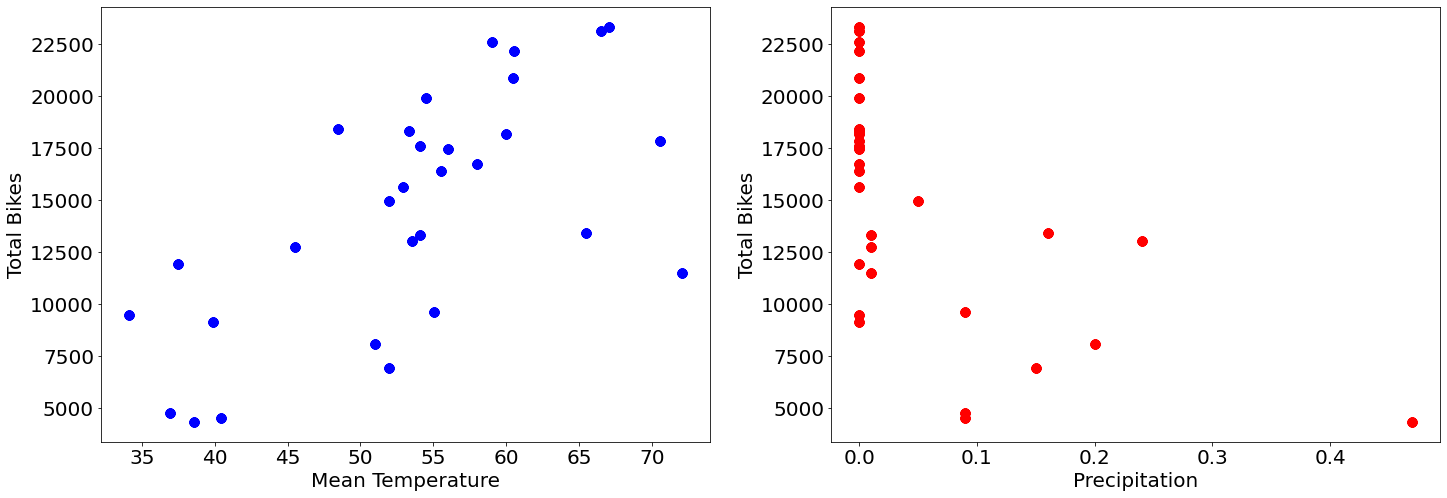

In [6]:
# Plotting our data
fig = plt.figure(figsize=(24,8))

# Plotting bike count vs temperature
ax = fig.add_subplot(121)
ax.scatter(data['Mean_Temp'], data['Total'], linewidth=4, color='blue')
ax.tick_params(axis="x", labelsize=20) 
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Mean Temperature', fontsize=20)
ax.set_ylabel('Total Bikes', fontsize=20)

# Plotting bike count vs precipitation
ax2 = fig.add_subplot(122)
ax2.scatter(data['Precipitation'], data['Total'], linewidth=4, color='red')
ax2.tick_params(axis="x", labelsize=20) 
ax2.tick_params(axis="y", labelsize=20)
ax2.set_xlabel('Precipitation', fontsize=20)
ax2.set_ylabel('Total Bikes', fontsize=20)

plt.show()

## Modelling

In [7]:
# Fitting the GLM with a Poisson link function
model = glm('Total ~ Mean_Temp', data = data[['Total','Mean_Temp']], family = sm.families.Poisson())

In [8]:
# Fit model
results = model.fit()

In [9]:
# Get results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Total   No. Observations:                  210
Model:                            GLM   Df Residuals:                      208
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4827e+05
Date:                Sun, 24 Jul 2022   Deviance:                   2.9417e+05
Time:                        19:12:26   Pearson chi2:                 2.71e+05
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1461      0.003   2390.129      0.000       8.139       8.153
Mean_Temp      0.0263      6e-05    437.639      0.000       0.026       0.026
==============================================================================
"""

## Analysis

In [14]:
# Our x values
x = np.linspace(data['Mean_Temp'].min(),data['Mean_Temp'].max(),50)

In [15]:
# Compute the output using the log link GLM
y = np.exp(x*results.params[1] + results.params[0])

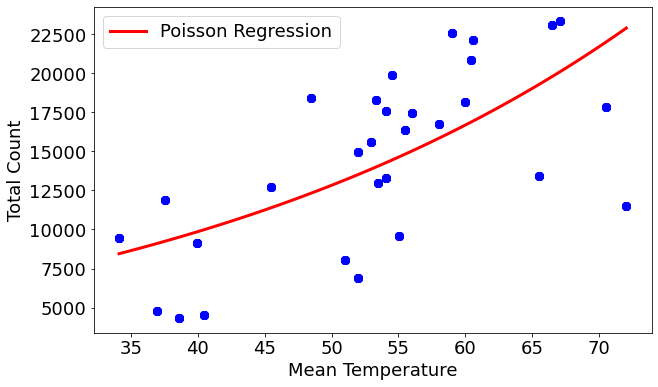

In [18]:
# Plotting our results
plt.figure(figsize=(10,6))
plt.scatter(data['Mean_Temp'], data['Total'], linewidth=3, color='blue')
plt.plot(x, y, label = 'Poisson Regression', color='red', linewidth=3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Mean Temperature', fontsize=18)
plt.ylabel('Total Count', fontsize=18 )
plt.legend(fontsize=18)
plt.show()